# Iris Dataset - SOFENN Example

Demonstrate multi-class classification with SOFENN on classic Iris Dataset

In [ ]:
import sys
sys.path.append("../src")

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
import numpy as np

from sklearn import datasets
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

from sofenn import SelfOrganizer

import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

## Read in and prep Iris Dataset

In [3]:
# read in iris dataset
iris = datasets.load_iris()
# create one-hot encoded vector for each class
Y = []
for y in iris.target:
    tmp = np.zeros(3)
    tmp[y] = 1
    Y.append(tmp)
Y = np.array(Y)
    
# split to train/test
X_train, X_test, y_train, y_test = train_test_split(iris.data, Y, test_size=0.1)

## Create Self Organizer

In [4]:
sofnn = SelfOrganizer(
             ksig=1.12, max_widens=250,          # adding neuron or widening centers
             prune_tol=0.85, k_rmse=0.1,          # pruning parameters
             debug=True
                )

### Create Network

In [5]:
start_neurons = 5

sofnn.build_network(
                 X_train, X_test, y_train, y_test,        # data attributes
                 neurons=start_neurons, max_neurons=100,  # neuron initialization parameters
                 ifpart_thresh=0.1354,                    # ifpart and error thresholds
                 prob_type='classification'               # type of problem (classification/regression)
)

network = sofnn.network

Building Fuzzy Network with 5 neurons...
Instructions for updating:
Colocations handled automatically by placer.
...Model successfully built!


### Compile Model

In [6]:
loss = sofnn.network.loss_function
optimizer = 'adam'
metrics = ['binary_accuracy']

sofnn.compile_model(init_c=True, random=True, init_s=True, s_0=4.0,
                    loss=loss, optimizer=optimizer, metrics=metrics)

Compiling model...
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Inputs (InputLayer)             (None, 4)            0                                            
__________________________________________________________________________________________________
FuzzyRules (FuzzyLayer)         (None, 5)            40          Inputs[0][0]                     
__________________________________________________________________________________________________
Normalization (NormalizedLayer) (None, 5)            0           FuzzyRules[0][0]                 
__________________________________________________________________________________________________
Weights (WeightedLayer)         (None, 5)            25          Inputs[0][0]                     
                                                                 Normalization[0][0]      

### Train model

In [7]:
sofnn.train_model(epochs=45)

Training model...
Instructions for updating:
Use tf.cast instead.
Epoch 1/45
135/135 [==============================] - 0s 796us/step - loss: 10.2577 - binary_accuracy: 0.6667
Epoch 2/45
135/135 [==============================] - 0s 28us/step - loss: 10.2379 - binary_accuracy: 0.6667
Epoch 3/45
135/135 [==============================] - 0s 30us/step - loss: 10.2123 - binary_accuracy: 0.6667
Epoch 4/45
135/135 [==============================] - 0s 35us/step - loss: 10.1920 - binary_accuracy: 0.6667
Epoch 5/45
135/135 [==============================] - 0s 30us/step - loss: 10.1726 - binary_accuracy: 0.6667
Epoch 6/45
135/135 [==============================] - 0s 27us/step - loss: 10.1481 - binary_accuracy: 0.6667
Epoch 7/45
135/135 [==============================] - 0s 30us/step - loss: 10.1184 - binary_accuracy: 0.6667
Epoch 8/45
135/135 [==============================] - 0s 24us/step - loss: 10.0903 - binary_accuracy: 0.6667
Epoch 9/45
135/135 [==============================] - 0s 32us

In [8]:
# loss = 'mean_squared_error'
loss = sofnn.network.loss_function
optimizer = 'adam'
metrics = ['binary_accuracy']

model = sofnn.model

model.compile(loss=loss,
              optimizer=optimizer,
              metrics=metrics)

model.fit(np.array(X_train),
          np.array(y_train),
          epochs=250,
          verbose=1,
          batch_size=2)

Epoch 1/250
135/135 [==============================] - 0s 1ms/step - loss: 0.4268 - binary_accuracy: 0.8716
Epoch 2/250
135/135 [==============================] - 0s 247us/step - loss: 0.3859 - binary_accuracy: 0.8765
Epoch 3/250
135/135 [==============================] - 0s 241us/step - loss: 0.3514 - binary_accuracy: 0.8716
Epoch 4/250
135/135 [==============================] - 0s 241us/step - loss: 0.3279 - binary_accuracy: 0.8519
Epoch 5/250
135/135 [==============================] - 0s 250us/step - loss: 0.3134 - binary_accuracy: 0.8593
Epoch 6/250
135/135 [==============================] - 0s 220us/step - loss: 0.2993 - binary_accuracy: 0.8568
Epoch 7/250
135/135 [==============================] - 0s 235us/step - loss: 0.2896 - binary_accuracy: 0.8593
Epoch 8/250
135/135 [==============================] - 0s 259us/step - loss: 0.2815 - binary_accuracy: 0.8420
Epoch 9/250
135/135 [==============================] - 0s 236us/step - loss: 0.2763 - binary_accuracy: 0.8519
Epoch 10/250

135/135 [==============================] - 0s 266us/step - loss: 0.0651 - binary_accuracy: 0.9852
Epoch 75/250
135/135 [==============================] - 0s 278us/step - loss: 0.0613 - binary_accuracy: 0.9827
Epoch 76/250
135/135 [==============================] - 0s 265us/step - loss: 0.0607 - binary_accuracy: 0.9827
Epoch 77/250
135/135 [==============================] - 0s 253us/step - loss: 0.0606 - binary_accuracy: 0.9852
Epoch 78/250
135/135 [==============================] - 0s 263us/step - loss: 0.0591 - binary_accuracy: 0.9802
Epoch 79/250
135/135 [==============================] - 0s 255us/step - loss: 0.0594 - binary_accuracy: 0.9827
Epoch 80/250
135/135 [==============================] - 0s 255us/step - loss: 0.0595 - binary_accuracy: 0.9753
Epoch 81/250
135/135 [==============================] - 0s 263us/step - loss: 0.0572 - binary_accuracy: 0.9852
Epoch 82/250
135/135 [==============================] - 0s 259us/step - loss: 0.0567 - binary_accuracy: 0.9852
Epoch 83/250
1

135/135 [==============================] - 0s 231us/step - loss: 0.0350 - binary_accuracy: 0.9852
Epoch 148/250
135/135 [==============================] - 0s 242us/step - loss: 0.0370 - binary_accuracy: 0.9951
Epoch 149/250
135/135 [==============================] - 0s 225us/step - loss: 0.0363 - binary_accuracy: 0.9901
Epoch 150/250
135/135 [==============================] - 0s 224us/step - loss: 0.0366 - binary_accuracy: 0.9951
Epoch 151/250
135/135 [==============================] - 0s 219us/step - loss: 0.0380 - binary_accuracy: 0.9901
Epoch 152/250
135/135 [==============================] - 0s 215us/step - loss: 0.0376 - binary_accuracy: 0.9901
Epoch 153/250
135/135 [==============================] - 0s 216us/step - loss: 0.0394 - binary_accuracy: 0.9802
Epoch 154/250
135/135 [==============================] - 0s 214us/step - loss: 0.0382 - binary_accuracy: 0.9901
Epoch 155/250
135/135 [==============================] - 0s 220us/step - loss: 0.0375 - binary_accuracy: 0.9852
Epoch 

135/135 [==============================] - 0s 223us/step - loss: 0.0328 - binary_accuracy: 0.9901
Epoch 221/250
135/135 [==============================] - 0s 227us/step - loss: 0.0326 - binary_accuracy: 0.9901
Epoch 222/250
135/135 [==============================] - 0s 229us/step - loss: 0.0310 - binary_accuracy: 0.9901
Epoch 223/250
135/135 [==============================] - 0s 226us/step - loss: 0.0338 - binary_accuracy: 0.9852
Epoch 224/250
135/135 [==============================] - 0s 223us/step - loss: 0.0335 - binary_accuracy: 0.9901
Epoch 225/250
135/135 [==============================] - 0s 222us/step - loss: 0.0332 - binary_accuracy: 0.9901
Epoch 226/250
135/135 [==============================] - 0s 228us/step - loss: 0.0344 - binary_accuracy: 0.9901
Epoch 227/250
135/135 [==============================] - 0s 246us/step - loss: 0.0326 - binary_accuracy: 0.9901
Epoch 228/250
135/135 [==============================] - 0s 230us/step - loss: 0.0337 - binary_accuracy: 0.9852
Epoch 

In [9]:
sofnn.network.get_layer_weights('FuzzyRules')

[array([[ 4.4675217 ,  7.4513497 ,  6.43628   ,  6.364353  ,  5.580315  ],
        [ 1.3548213 ,  1.8974671 ,  1.9997003 ,  4.2788334 ,  4.159631  ],
        [ 4.057565  ,  7.0921984 ,  6.724616  ,  1.0480616 ,  1.4635618 ],
        [ 2.1701875 ,  3.3342218 ,  3.6867945 , -0.40693808, -0.31991798]],
       dtype=float32),
 array([[1.07859  , 4.161756 , 3.9686017, 4.898035 , 4.634765 ],
        [1.7514194, 2.8434436, 2.8087685, 3.5762403, 3.4051254],
        [1.6232406, 2.9282587, 3.0017173, 3.4349418, 3.3457341],
        [1.4170544, 2.145387 , 2.4165778, 2.8306563, 2.702972 ]],
       dtype=float32)]

In [10]:
X_test

array([[5.8, 2.7, 5.1, 1.9],
       [5.6, 3. , 4.1, 1.3],
       [5.8, 2.7, 5.1, 1.9],
       [5.7, 2.6, 3.5, 1. ],
       [5.6, 2.8, 4.9, 2. ],
       [5.4, 3.4, 1.5, 0.4],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.9, 3. , 5.1, 1.8],
       [5.7, 2.8, 4.1, 1.3],
       [6.1, 2.8, 4.7, 1.2],
       [5.5, 2.3, 4. , 1.3],
       [6.9, 3.1, 5.1, 2.3],
       [4.8, 3.4, 1.6, 0.2],
       [6.7, 3.1, 4.7, 1.5]])

In [11]:
y_test

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [12]:
y_pred = model.predict(X_test)
y_pred.round()

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]], dtype=float32)

In [13]:
acc = y_test == y_pred.round()
acc

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

In [14]:
acc.sum() / acc.size

1.0

## Model Prediction Results

In [15]:
pred_loss, pred_bin_acc = model.evaluate(X_test, y_test)
print('Model Loss: {:0.8f}'.format(pred_loss))
print('Binary Accuracy: {:2.1f}%'.format(100*pred_bin_acc))

15/15 [==============================] - 0s 2ms/step
Model Loss: 0.04002071
Binary Accuracy: 100.0%


In [16]:
model.metrics_names

['loss', 'binary_accuracy']

## Plot Results

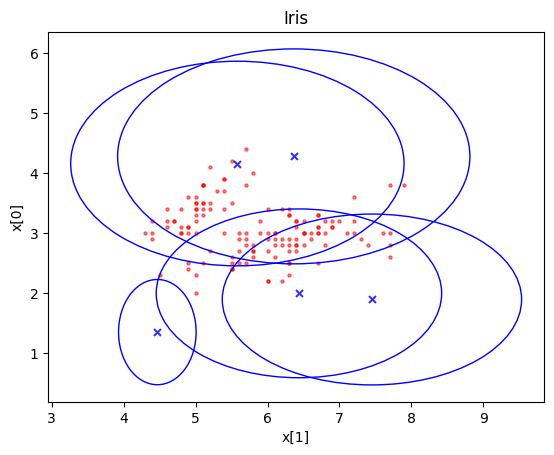

In [17]:
w = sofnn.network.get_layer_weights('FuzzyRules')


plt.clf()
plt.title('Iris')
plt.ylabel('x[0]')
plt.xlabel('x[1]')
plt.scatter([a[0] for a in X_train], [a[1] for a in X_train], color='r', alpha=0.5, s=5)
for i in range(0,sofnn.network.neurons):
    ellipse = Ellipse((w[0][0][i], w[0][1][i]), w[1][0][i],w[1][1][i], color='b', fill=False)
    ax = plt.gca()
    ax.add_patch(ellipse)

plt.scatter(w[0][0], w[0][1], color='b', alpha=0.8, s=25, marker='x')
plt.show()